# Analysis of Lending Club Loan Data 

### Company Information:
Lending Club is a peer to peer lending company based in the United States, in which investors provide funds for potential borrowers and investors earn a profit depending on the risk they take (the borrowers credit score). Lending Club provides the "bridge" between investors and borrowers. For more basic information about the company please check out the wikipedia article about the company.

### How Lending Club Works?

<img src="lending_mechanism.PNG">

Image Source: [The U.S. Securities and Exchange Commission](https://www.sec.gov/Archives/edgar/data/1409970/000119312514323136/d766811ds1.htm)

### About Dataset
The dataset was collected from [Lending Club website](https://www.lendingclub.com/info/download-data.action). It contains complete loan data for all loans issued through the 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. The file containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter. Additional features include credit scores, number of finance inquiries, address including zip codes, and state, and collections among others. The file is a matrix of about 890 thousand observations and 75 variables. A data dictionary is provided in a separate file called LCDataDictionary

### About This Analysis
The analysis consists of three parts:

**[Part I: Exploratory Data Analysis](#Exploratory_Data_Analysis)**<br>
Major questions to answer:<br>
[1. Does the installment amount affect loan status ?](#Installment_amount)<br>
[2. Does the installment grade affect loan status ?](#Grade)<br>
[3. Which grade has highest default rate ?](#Home_Status)<br>
[4. Does annual income/home-ownership affect default rate ?](#annual_income)<br>
[5. Which state has highest default rate ?](#State)<br>

**[Part II: Text Analysis](#text_analysis)**<br>
[1. Is it that a people with a certain empoyee title are taking up more loans as compared to others ?](#debt_title)<br>
[2. Does a specific purpose affect loan status ?](#debt_purpose)

**[Part III. Model Building](#model_building)**<br>
[1. Cleaning the data](#cleaning_data)<br>
   * Selecting necessary features
   * Taking care of nan values <br>
 
[2. Model Selection](#ModelSelection)<br>
Comparison accuracies of 6 models
   * Model 1 - XGBoostClassifier
   * Model 2 - Support Vector Classifier(SCV)
   * Model 3 - RandomForestClassifier
   * Model 4 - Logistic
   * Model 5 - BalancedBaggingClassifier
   * Model 6 - Decision Tree

In [67]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing the libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

from subprocess import check_output
# Reading the dataset
data = pd.read_csv("./lending-club-loan-data/loan.csv")
data_1 = pd.DataFrame(data) # Creating a copy


In [11]:
# Checking the first 5 rows of dataset
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# descriptions of data
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


In [69]:
# Replace the name of some columns
df = data.rename(columns={"loan_amnt": "loan_amount", "funded_amnt": "funded_amount", 
                          "funded_amnt_inv": "investor_funds","int_rate": "interest_rate",
                          "annual_inc": "annual_income"})

# Drop irrelevant columns
df.drop(['id', 'member_id', 'emp_title', 'url', 'desc', 'zip_code',
         'title'], axis=1, inplace=True)

### Similar Distributions:
We will start by exploring the distribution of the loan amounts and see when did the loan amount issued increased significantly. 

**What we need to know:**

* Understand what amount was mostly issued to borrowers.
* Which year issued the most loans.
* The distribution of loan amounts is a multinomial distribution .

**Summary:**

* Most of the loans issued were in the range of 10,000 to 20,000 USD.
* The year of 2015 was the year were most loans were issued.
* Loans were issued in an incremental manner. (Possible due to a recovery in the U.S economy)
* The loans applied by potential borrowers, the amount issued to the borrowers and the amount funded by investors are similarly distributed, meaning that it is most likely that qualified borrowers are going to get the loan they had applied for.

Text(0.5,1,'Total committed by Investors')

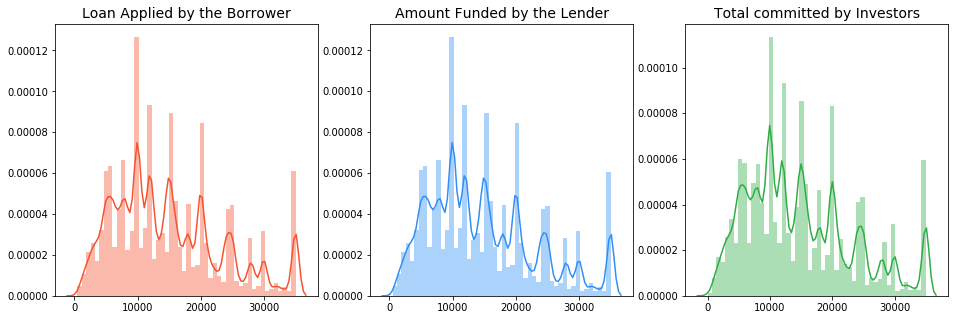

In [70]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))


loan_amount = df["loan_amount"].values
funded_amount = df["funded_amount"].values
investor_funds = df["investor_funds"].values


sns.distplot(loan_amount, ax=ax[0], color="#F7522F")
ax[0].set_title("Loan Applied by the Borrower", fontsize=14)
sns.distplot(funded_amount, ax=ax[1], color="#2F8FF7")
ax[1].set_title("Amount Funded by the Lender", fontsize=14)
sns.distplot(investor_funds, ax=ax[2], color="#2EAD46")
ax[2].set_title("Total committed by Investors", fontsize=14)

In [71]:
# Lets' transform the issue dates by year.
df['issue_d'].head()
dt_series = pd.to_datetime(df['issue_d'])
df['year'] = dt_series.dt.year

Text(0,0.5,'Average loan amount issued')

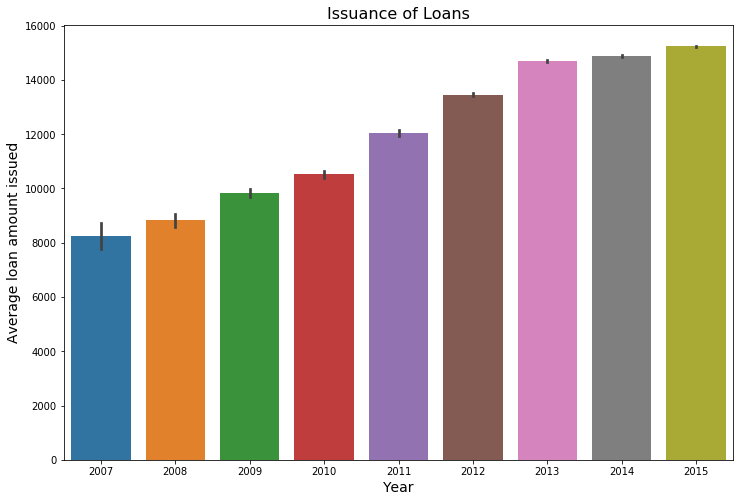

In [72]:
# The year of 2015 was the year were the highest amount of loans were issued 
# This is an indication that the economy is quiet recovering itself.
plt.figure(figsize=(12,8))
sns.barplot('year', 'loan_amount', data=df, palette='tab10')
plt.title('Issuance of Loans', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average loan amount issued', fontsize=14)

In [75]:
data = data.iloc[:,2:-30].values

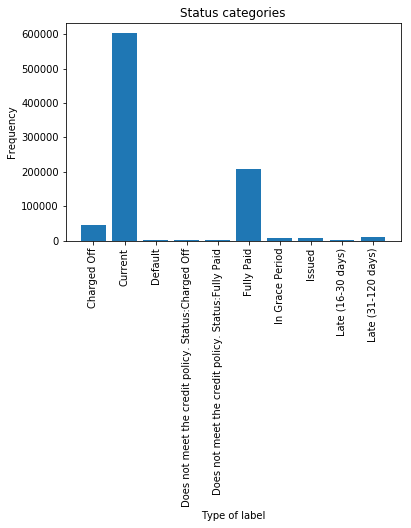

                                                   0       1
0                                        Charged Off   45248
1                                            Current  601779
2                                            Default    1219
3  Does not meet the credit policy. Status:Charge...     761
4  Does not meet the credit policy. Status:Fully ...    1988
5                                         Fully Paid  207723
6                                    In Grace Period    6253
7                                             Issued    8460
8                                  Late (16-30 days)    2357
9                                 Late (31-120 days)   11591


In [76]:
# Setting the target vector
status = data[:,14]
unique_labels = np.unique(status, return_counts = True)
# print(unique_labels)

plt.figure()
plt.bar(unique_labels[0],unique_labels[1])
plt.xlabel('Type of label')
plt.ylabel('Frequency')
plt.title('Status categories')
plt.xticks(rotation=90)
plt.show()

category = unique_labels[0]
frequency = unique_labels[1]
category_count = np.vstack((category,frequency))
category_list = np.array(category_count.T).tolist()
category_list_1 = pd.DataFrame(category_list)
print(category_list_1)

Let consider only 2 major categories "Charged off" and "Fully Paid". A few reasons to do this:

1. To convert it into a binary cassification problem, and to analyze in detail the effect of important variables on the loan status.
2. A lot of observations show status "Current", so we do not know whether it will be "Charged Off", "Fully Paid" or "Default".
3. The observations for "Default" are too less as compared to "Fully Paid" or "Charged Off", to thoughroly investigate those observations with loan status as "Default".
4. The remaining categories of "loan status" are not of prime importance for this analysis.

In [31]:
category_one_data = data_1[data_1.loan_status == "Fully Paid"]
category_two_data = data_1[data_1.loan_status == "Charged Off"]
new_data = np.vstack((category_one_data,category_two_data))
# new_data_copy = pd.DataFrame(new_data)
new_data = new_data[:,2:-30]
new_data_df = pd.DataFrame(new_data)

<a id='Exploratory_Data_Analysis'></a>
## Pat I: Exploratory Data Analysis
<a id='Installment_amount'></a>
**1. Variable under inspection: Installment amount**<br> 
Consider whether there is any trend with respect to installment amount. For eg: Higher the installment amount higher the number of "Charged Off" observations ?

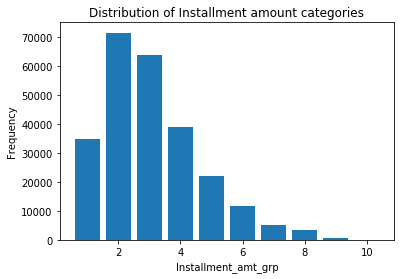

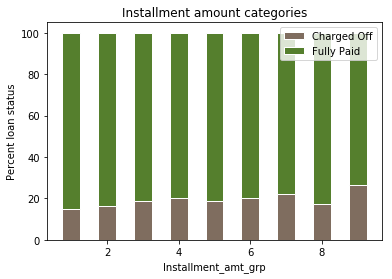

In [32]:
# Creating bins for various installment amounts
installment_amt = new_data[:,5]
bins = np.linspace(installment_amt.min(), installment_amt.max(), 10)
installment_amt = installment_amt.astype(float).reshape(installment_amt.size,1)
binned_installment_amt = pd.DataFrame(np.digitize(installment_amt, bins))                  
installment_groups = (np.array(np.unique(binned_installment_amt, return_counts = True))).T

# A bar plot to figure out the distribution of installment amount
plt.figure()
plt.bar(installment_groups[:,0],installment_groups[:,1])
plt.xlabel('Installment_amt_grp')
plt.ylabel('Frequency')
plt.title('Distribution of Installment amount categories')
plt.show()

# Appending the installment_groups to status
status_new = new_data_df[14]
factored_status = np.array(pd.factorize(status_new)) # 0's = Fully Paid, 1's = Charged Off
status_labels = pd.DataFrame(factored_status[0])
status_installment_groups = pd.DataFrame(np.hstack((binned_installment_amt,status_labels)))
status_installment_groups.columns = ['Installment_amt_grp','status_labels'] 

# Looking for a trend in the defaulted observations
Charged_off = status_installment_groups[status_installment_groups.status_labels == 1]
temp_1 = Charged_off.iloc[:,0].values
plot_var_1 = np.array(np.unique(temp_1, return_counts = True))
plot_var_1 = plot_var_1[:,:-1]
plot_var_11 = plot_var_1.T # Eliminating the 10th, since as only one reading

# Looking for a trend in the successful observations
Fully_paid = status_installment_groups[status_installment_groups.status_labels == 0]
temp_2 = Fully_paid.iloc[:,0].values
plot_var_2 = np.array(np.unique(temp_2, return_counts = True))
plot_var_22 = plot_var_2.T

# Concatenating the two variables
plot_var_stack = np.hstack((plot_var_11,plot_var_22))
plot_var_stack = pd.DataFrame(plot_var_stack)
plot_var_stack = plot_var_stack.drop(plot_var_stack.columns[2], axis=1)
plot_var_stack.columns = ['Installment_amt_grp','Charged Off','Fully Paid']

# Percent stacked
# From raw value to percentage
totals = [i+j for i,j in zip(plot_var_stack['Charged Off'], plot_var_stack['Fully Paid'])]
C_Off = [i / j * 100 for i,j in zip(plot_var_stack['Charged Off'], totals)]
mean_C_Off = np.mean(C_Off)
F_Paid = [i / j * 100 for i,j in zip(plot_var_stack['Fully Paid'], totals)]
plot_var_stack = np.array(plot_var_stack)
group_number = plot_var_stack[:,0]
p1 = plt.bar(group_number, C_Off, color='#7f6d5f', edgecolor='white', width=0.5)
p2 = plt.bar(group_number, F_Paid, bottom=C_Off, color='#557f2d', 
             edgecolor='white', width=0.5)

#Axes.axhline(y=mean_C_Off)
plt.xlabel('Installment_amt_grp')
plt.ylabel('Percent loan status')
plt.title('Installment amount categories')
plt.legend((p1, p2), ('Charged Off', 'Fully Paid'), loc = 'upper right')
plt.show()

Though we can observe a slight variation in the "% Charged Off" values, overall we can say that the installment amount does not seem to affect the loan status.

<a id='Grade'></a>
**2. Variable under inspection: Grade.** <br>
Does the grade affects the Installment amount ?

   0      1
0  A  42296
1  B  76065
2  C  65320
3  D  40506
4  E  19186
5  F   7660
6  G   1938


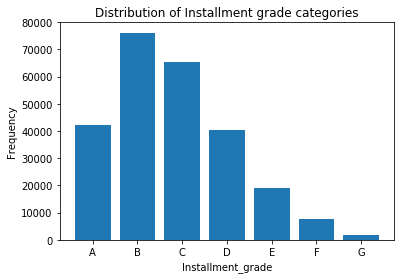

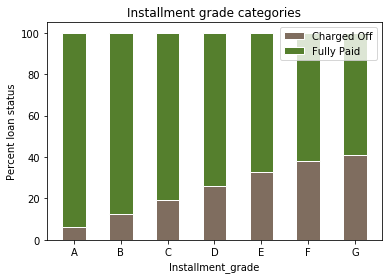

In [33]:
installment_grade = new_data[:,6]
# print(np.unique(installment_grade, return_counts = True))
installment_grade_list = np.array(np.unique(installment_grade, return_counts = True))
installment_grade_df = pd.DataFrame(installment_grade_list.T)
print(installment_grade_df)

# Distribution of Installment grade
plt.figure()
plt.bar(installment_grade_df[0],installment_grade_df[1])
plt.xlabel('Installment_grade')
plt.ylabel('Frequency')
plt.title('Distribution of Installment grade categories')
plt.show()

installment_grade = pd.DataFrame(installment_grade)
status_installment_grade = pd.DataFrame(np.hstack((installment_grade,status_labels)))
status_installment_grade.columns = ['Installment_grade','status_labels']

# Looking for a trend in the defaulted observations
Charged_off_grade = status_installment_grade[status_installment_grade.status_labels == 1]
temp_11 = Charged_off_grade.iloc[:,0].values
plot_var_grade = np.array(np.unique(temp_11, return_counts = True))
plot_var_grade_11 = plot_var_grade.T 

# Looking for a trend in the successful observations
Fully_Paid_grade = status_installment_grade[status_installment_grade.status_labels == 0]
temp_22 = Fully_Paid_grade.iloc[:,0].values
plot_var_grade_2 = np.array(np.unique(temp_22, return_counts = True))
plot_var_grade_22 = plot_var_grade_2.T # Eliminating the 10th, since as only one reading

# Concatenating the two variables
plot_var_stack_1 = np.hstack((plot_var_grade_11,plot_var_grade_22))
plot_var_stack_1 = pd.DataFrame(plot_var_stack_1)
plot_var_stack_1 = plot_var_stack_1.drop(plot_var_stack_1.columns[2], axis=1)
plot_var_stack_1.columns = ['Installment_grade_grp','Charged Off','Fully Paid']

# Percent stacked
# From raw value to percentage
totals = [i+j for i,j in zip(plot_var_stack_1['Charged Off'], plot_var_stack_1['Fully Paid'])]
C_Off = [i / j * 100 for i,j in zip(plot_var_stack_1['Charged Off'], totals)]
mean_C_Off = np.mean(C_Off)
F_Paid = [i / j * 100 for i,j in zip(plot_var_stack_1['Fully Paid'], totals)]
# plot_var_stack_1 = np.array(plot_var_stack_1)
group_number = plot_var_stack_1['Installment_grade_grp']
p1 = plt.bar(group_number, C_Off, color='#7f6d5f', edgecolor='white', width=0.5)
p2 = plt.bar(group_number, F_Paid, bottom=C_Off, color='#557f2d', 
             edgecolor='white', width=0.5)

#Axes.axhline(y=mean_C_Off)
plt.xlabel('Installment_grade')
plt.ylabel('Percent loan status')
plt.title('Installment grade categories')
plt.legend((p1, p2), ('Charged Off', 'Fully Paid'), loc = 'upper right')
plt.show()

* The grade does seem to affect the default rate: Higher the grade higher the percentage of "Charged Off" loans.
* Also from the plot we can conclude that Grade G has the highest "% Charged Off"
* To further investigate this we need to know what the Grade refers to, does it represent risk factor in lending the money ? If yes, then the results make sense: Higher the grade higher the risk factor.
* Also, from the distribution plot we can see that they are already lending only a handful amount of loans to people classified in "Grade G". They should be more precautious in their approach to lending money to customers who are classified to be in higher grades.

<a id='Home_Status'></a>
**3. Variable under inspection: Home Status**

          0       1
0       ANY       1
1  MORTGAGE  124844
2      NONE      43
3     OTHER     141
4       OWN   21985
5      RENT  105957


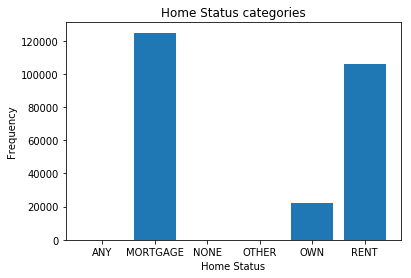

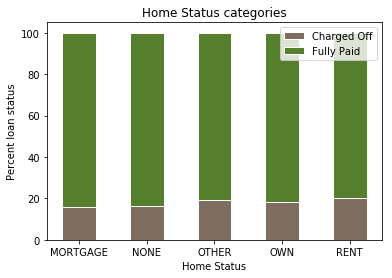

In [34]:
home_status = new_data_df[10]
# print(np.unique(home_status, return_counts = True))
home_status_list = np.array(np.unique(home_status, return_counts = True))
home_status_df = pd.DataFrame(home_status_list.T)
print(home_status_df)

# Distribution of Emp_length
plt.figure()
plt.bar(home_status_df[0],home_status_df[1])
plt.xlabel('Home Status')
plt.ylabel('Frequency')
plt.title('Home Status categories')
plt.show()

home_status = pd.DataFrame(home_status)
status_home_status = pd.DataFrame(np.hstack((home_status,status_labels)))
status_home_status.columns = ['Home Status','status_labels']

# Looking for a trend in the defaulted observations
Charged_off_home_status = status_home_status[status_home_status.status_labels == 1]
temp_41 = Charged_off_home_status.iloc[:,0].values
plot_var_home_status = np.array(np.unique(temp_41, return_counts = True))
plot_var_home_status_44 = pd.DataFrame(plot_var_home_status.T) 

# Looking for a trend in the successful observations
Fully_Paid_home_status = status_home_status[status_home_status.status_labels == 0]
temp_42 = Fully_Paid_home_status.iloc[:,0].values
plot_var_home_status_2 = np.array(np.unique(temp_42, return_counts = True))
plot_var_home_status_55 = pd.DataFrame(plot_var_home_status_2.T) # Eliminating the 10th, since as only one reading
plot_var_home_status_55 = plot_var_home_status_55.drop(0) # Eliminating the home status = "any", since as only one reading

# Concatenating the two variables
plot_var_stack_3 = np.hstack((plot_var_home_status_44,plot_var_home_status_55))
plot_var_stack_3 = pd.DataFrame(plot_var_stack_3)
plot_var_stack_3 = plot_var_stack_3.drop(plot_var_stack_3.columns[2], axis=1)
plot_var_stack_3.columns = ['Home Status','Charged Off','Fully Paid']

# Percent stacked
# From raw value to percentage
totals = [i+j for i,j in zip(plot_var_stack_3['Charged Off'], plot_var_stack_3['Fully Paid'])]
C_Off = [i / j * 100 for i,j in zip(plot_var_stack_3['Charged Off'], totals)]
mean_C_Off = np.mean(C_Off)
F_Paid = [i / j * 100 for i,j in zip(plot_var_stack_3['Fully Paid'], totals)]
#plot_var_stack_3 = np.array(plot_var_stack_3)
group_number = plot_var_stack_3['Home Status']
p1 = plt.bar(group_number, C_Off, color='#7f6d5f', edgecolor='white', width=0.5)
p2 = plt.bar(group_number, F_Paid, bottom=C_Off, color='#557f2d', edgecolor='white', width=0.5)
#Axes.axhline(y=mean_C_Off)
plt.xlabel('Home Status')
plt.ylabel('Percent loan status')
plt.title('Home Status categories')
plt.legend((p1, p2), ('Charged Off', 'Fully Paid'), loc = 'upper right')
plt.show()

From the stacked percentage plot, we can observe that the feature "Home Status" has no potential effect on our target variable "loan status"

**4. Variable under inspection: Annual Income**
<a id='annual_income'></a>
<br>To investigate this variable I create four bins to classify the annual income:

`1` People earning less than USD 40,000. <br>
`2` People earning between USD 40,000 to USD 70,000.<br>
`3` People earning between USD 70,000 to USD 100,000.<br>
`4` People earning more than USD 100,000. <br>

No handles with labels found to put in legend.


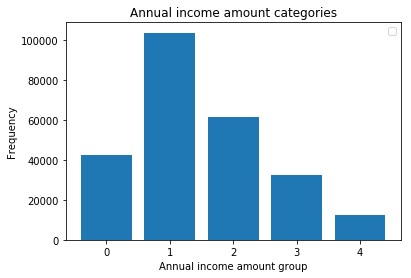

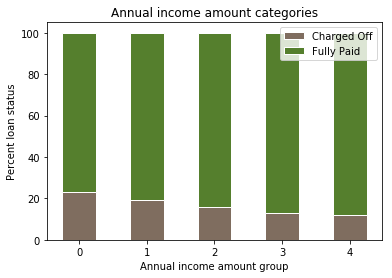

In [35]:
## Now checking the effect of annual income on loan status
# Creating bins for various income amounts
annual_income = new_data[:,11]
#bins_2 = np.linspace(annual_income.min(), annual_income.max(), 3)
bins_2 = np.array([40000,70000,100000,150000])
annual_income = annual_income.astype(float).reshape(annual_income.size,1)
binned_annual_income = pd.DataFrame(np.digitize(annual_income, bins_2))                  
annual_groups = (np.array(np.unique(binned_annual_income, return_counts = True))).T

# A bar plot to figure out the distribution of income amount
plt.figure()
plt.bar(annual_groups[:,0],annual_groups[:,1])
plt.xlabel('Annual income amount group')
plt.ylabel('Frequency')
plt.title('Annual income amount categories')
plt.legend(loc="upper right")
plt.show()

# Appending the income_groups to status
status_annual_groups = pd.DataFrame(np.hstack((binned_annual_income,status_labels)))
status_annual_groups.columns = ['Annual_income_grp','status_labels'] 

# Looking for a trend in the defaulted observations
Charged_off_annual_income = status_annual_groups[status_annual_groups.status_labels == 1]
temp_51 = Charged_off_annual_income.iloc[:,0].values
plot_var_annual_income = np.array(np.unique(temp_51, return_counts = True))
plot_var_annual_income_66 = pd.DataFrame(plot_var_annual_income.T) 

# Looking for a trend in the successful observations
Fully_Paid_annual_income = status_annual_groups[status_annual_groups.status_labels == 0]
temp_52 = Fully_Paid_annual_income.iloc[:,0].values
plot_var_annual_income_2 = np.array(np.unique(temp_52, return_counts = True))
plot_var_annual_income_77 = pd.DataFrame(plot_var_annual_income_2.T) # Eliminating the 10th, since as only one reading
#plot_var_annual_income_55 = plot_var_home_status_55.drop(0) # Eliminating the home status = "any", since as only one reading

# Concatenating the two variables
plot_var_stack_4 = np.hstack((plot_var_annual_income_66,plot_var_annual_income_77))
plot_var_stack_4 = pd.DataFrame(plot_var_stack_4)
plot_var_stack_4 = plot_var_stack_4.drop(plot_var_stack_4.columns[2], axis=1)
plot_var_stack_4.columns = ['Annual Income Group','Charged Off','Fully Paid']

# Percent stacked
# From raw value to percentage
totals = [i+j for i,j in zip(plot_var_stack_4['Charged Off'], plot_var_stack_4['Fully Paid'])]
C_Off = [i / j * 100 for i,j in zip(plot_var_stack_4['Charged Off'], totals)]
mean_C_Off = np.mean(C_Off)
F_Paid = [i / j * 100 for i,j in zip(plot_var_stack_4['Fully Paid'], totals)]
#plot_var_stack_4 = np.array(plot_var_stack_4)
group_number = plot_var_stack_4['Annual Income Group']
p1 = plt.bar(group_number, C_Off, color='#7f6d5f', edgecolor='white', width=0.5)
p2 = plt.bar(group_number, F_Paid, bottom=C_Off, color='#557f2d', edgecolor='white', width=0.5)
#Axes.axhline(y=mean_C_Off)
plt.xlabel('Annual income amount group')
plt.ylabel('Percent loan status')
plt.title('Annual income amount categories')
plt.legend((p1, p2), ('Charged Off', 'Fully Paid'), loc = 'upper right')
plt.show()


We can observe a slight downword trend, which suggests that people with higher income are less likely to get "Charged Off".

**5. Variable under inspection: State**<a id='State'></a><br> 
An important question here would be to check whether the state affects the loan status. Also, to find out which state has highest "% Charged Off".

     0      1
0   AK    663
1   AL   3147
2   AR   1754
3   AZ   6077
4   CA  43110
5   CO   5613
6   CT   3681
7   DC    837
8   DE    667
9   FL  17545
10  GA   8014
11  HI   1478
12  IA      6
13  ID      6
14  IL   9253
15  IN   2800
16  KS   2083
17  KY   2268
18  LA   2952
19  MA   6139
20  MD   6007
21  ME     13
22  MI   5996
23  MN   4460
24  MO   3954
25  MS    421
26  MT    736
27  NC   6919
28  ND      8
29  NE     38
30  NH   1148
31  NJ   9601
32  NM   1377
33  NV   3809
34  NY  21338
35  OH   7738
36  OK   2131
37  OR   3353
38  PA   8399
39  RI   1087
40  SC   2818
41  SD    544
42  TN   2426
43  TX  19343
44  UT   2112
45  VA   7942
46  VT    428
47  WA   5915
48  WI   3078
49  WV   1137
50  WY    602


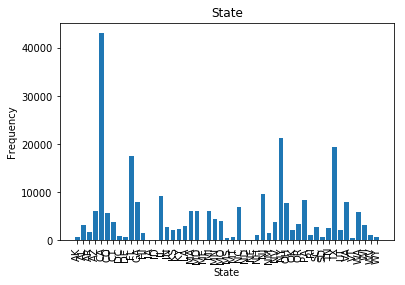

In [60]:
# Separating the variable under investigation
state = new_data_df[21]
#print(np.unique(state, return_counts = True))
state_list = np.array(np.unique(state, return_counts = True))
state_df = pd.DataFrame(state_list.T)
print(state_df)

# Distribution of Emp_length
plt.figure()
plt.bar(state_df[0],state_df[1])
plt.xlabel('State')
plt.ylabel('Frequency')
plt.title('State')
plt.xticks(rotation=90)
plt.show()

state = pd.DataFrame(state)
status_state = pd.DataFrame(np.hstack((state,status_labels)))
status_state.columns = ['State','status_labels']

# Looking for a trend in the defaulted observations
Charged_off_state = status_state[status_state.status_labels == 1]
temp_61 = Charged_off_state.iloc[:,0].values
plot_var_state = np.array(np.unique(temp_61, return_counts = True))
plot_var_state_88 = pd.DataFrame(plot_var_state.T) 

# Looking for a trend in the successful observations
Fully_Paid_state = status_state[status_state.status_labels == 0]
temp_62 = Fully_Paid_state.iloc[:,0].values
plot_var_state_2 = np.array(np.unique(temp_62, return_counts = True))
plot_var_state_99 = pd.DataFrame(plot_var_state_2.T) 


* We know US has only 50 States, but we have a list of 51 states. On investigation we can see that DC is added as a state even when it isn't a state.
* We also notice that its present in both the cases, charged off as well as in fully paid observations.<br>
So I decide on just eliminating DC from the list.
* Also, states like ME and ND have no people with "Charged Off" observations, so we will just take them off the list as well and check for any trends in the state variable

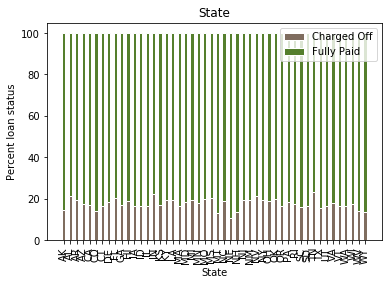

[['TN' 23.206924979389942]
 ['IN' 22.357142857142858]
 ['NV' 21.08164872669992]
 ['AL' 21.035907213218938]
 ['MS' 20.42755344418052]]


In [56]:
plot_var_state_88 = plot_var_state_88.drop(7)
# Eliminating the home status = "any", since as only one reading
plot_var_state_99 = plot_var_state_99.drop([7,21,28]) 

# Concatenating the two variables
plot_var_stack_5 = np.hstack((plot_var_state_88,plot_var_state_99))
plot_var_stack_5 = pd.DataFrame(plot_var_stack_5)
plot_var_stack_5 = plot_var_stack_5.drop(plot_var_stack_5.columns[2], axis=1)
plot_var_stack_5.columns = ['state','Charged Off','Fully Paid']

# Percent stacked
# From raw value to percentage
totals = [i+j for i,j in zip(plot_var_stack_5['Charged Off'], 
                             plot_var_stack_5['Fully Paid'])]
C_Off = [i / j * 100 for i,j in zip(plot_var_stack_5['Charged Off'], totals)]
mean_C_Off = np.mean(C_Off)
F_Paid = [i / j * 100 for i,j in zip(plot_var_stack_5['Fully Paid'], totals)]
#plot_var_stack_5 = np.array(plot_var_stack_5)
group_number = plot_var_stack_5['state']
p1 = plt.bar(group_number, C_Off, color='#7f6d5f', edgecolor='white', width=0.5)
p2 = plt.bar(group_number, F_Paid, bottom=C_Off, color='#557f2d', 
             edgecolor='white', width=0.5)
plt.xlabel('State')
plt.ylabel('Percent loan status')
plt.title('State')
plt.xticks(rotation=90)
plt.legend((p1, p2), ('Charged Off', 'Fully Paid'), loc = 'upper right')
plt.show()

###### Sort in order and print top 5 states with max default % ########
# Concatenating C_Off and state
C_Off = pd.DataFrame(C_Off)
temp_plot = np.hstack((plot_var_stack_5, C_Off))
temp_plot = pd.DataFrame(temp_plot)
temp_plot.columns = ['state','Charged Off','Fully Paid','% Charged Off']
temp_plot = np.array(temp_plot.sort_values(by = '% Charged Off',ascending = False))
print(temp_plot[0:5,(0,3)])

temp_plot = pd.DataFrame(temp_plot)
temp_plot.columns = ['state','Charged Off','Fully Paid','% Charged Off']
temp_plot = temp_plot.drop(['Charged Off', 'Fully Paid'], axis = 1)

* We can observe that there is variation of "% Charged Off" in the percent stacked plot.
* Though we cannot draw any strong conclusions of whether the "% Charged Off" is affected by the "State" variable, we can answer our question of which state has the highest "% Charged Off"?
* We could see state of Tennessee has the highest "% Charged Off" of 23.21%

In [49]:
# Chloropleth map for better visualization
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
 
for col in temp_plot.columns:
    temp_plot[col] = temp_plot[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

#temp_plot['text'] = temp_plot['state'] + '<br>' +\
#    'Default rate '+ temp_plot['% Charged Off']

data_chloropleth = [ dict(
        type ='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = temp_plot['state'],
        z = temp_plot['% Charged Off'].astype(float),
        locationmode = 'USA-states',
        #text = temp_plot['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Default rate")
        ) ]

layout = dict(
        title = 'State-wise % Charged Off<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict(type='albers usa'),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
#fig = dict(data=data_chloropleth, layout=layout)
#py.iplot(fig, image = 'png', filename = 'test-image-2', show_link = False)
# Change to py.iplot
chloromap = go.Figure(data = data_chloropleth, layout = layout)
iplot(chloromap, validate=False)

**6. Variable under inspection: Verification Status** <a id='Verification_Status'></a>

                 0      1
0     Not Verified  86064
1  Source Verified  74011
2         Verified  92896


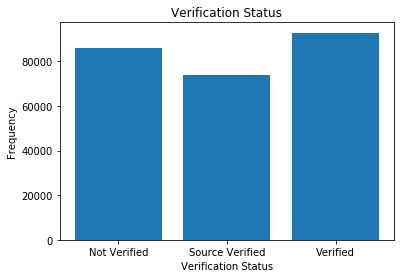

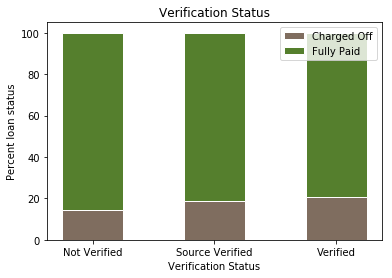

In [50]:
# Separating the variable under investigation
ver_stat = new_data_df[12]
#print(np.unique(ver_stat, return_counts = True))
ver_stat_list = np.array(np.unique(ver_stat, return_counts = True))
ver_stat_df = pd.DataFrame(ver_stat_list.T)
print(ver_stat_df)

# Distribution of Emp_length
plt.figure()
plt.bar(ver_stat_df[0],ver_stat_df[1])
plt.xlabel('Verification Status')
plt.ylabel('Frequency')
plt.title('Verification Status')
plt.show()

ver_stat = pd.DataFrame(ver_stat)
status_ver_stat = pd.DataFrame(np.hstack((ver_stat,status_labels)))
status_ver_stat.columns = ['Verification Status','status_labels']

# Looking for a trend in the defaulted observations
Charged_off_ver_stat = status_ver_stat[status_ver_stat.status_labels == 1]
temp_71 = Charged_off_ver_stat.iloc[:,0].values
plot_var_ver_stat = np.array(np.unique(temp_71, return_counts = True))
plot_var_ver_stat_101 = pd.DataFrame(plot_var_ver_stat.T) 

# Looking for a trend in the successful observations
Fully_Paid_ver_stat = status_ver_stat[status_ver_stat.status_labels == 0]
temp_72 = Fully_Paid_ver_stat.iloc[:,0].values
plot_var_ver_stat_2 = np.array(np.unique(temp_72, return_counts = True))
plot_var_ver_stat_111 = pd.DataFrame(plot_var_ver_stat_2.T) 

# Concatenating the two variables
plot_var_stack_6 = np.hstack((plot_var_ver_stat_101,plot_var_ver_stat_111))
plot_var_stack_6 = pd.DataFrame(plot_var_stack_6)
plot_var_stack_6 = plot_var_stack_6.drop(plot_var_stack_6.columns[2], axis=1)
plot_var_stack_6.columns = ['Verification Status','Charged Off','Fully Paid']

# Percent stacked
# From raw value to percentage
totals = [i+j for i,j in zip(plot_var_stack_6['Charged Off'], plot_var_stack_6['Fully Paid'])]
C_Off = [i / j * 100 for i,j in zip(plot_var_stack_6['Charged Off'], totals)]
mean_C_Off = np.mean(C_Off)
F_Paid = [i / j * 100 for i,j in zip(plot_var_stack_6['Fully Paid'], totals)]
#plot_var_stack_5 = np.array(plot_var_stack_5)
group_number = plot_var_stack_6['Verification Status']
p1 = plt.bar(group_number, C_Off, color='#7f6d5f', edgecolor='white', width=0.5)
p2 = plt.bar(group_number, F_Paid, bottom=C_Off, color='#557f2d', edgecolor='white', width=0.5)
plt.xlabel('Verification Status')
plt.ylabel('Percent loan status')
plt.title('Verification Status')
plt.legend((p1, p2), ('Charged Off', 'Fully Paid'), loc = 'upper right')
plt.show()

The result is slightly unexpected, as we would think that loan given after thorough verification would result in lesser percentage of "Charged Off" loans, but turns out that loans given off to people without verfication show a lesser "% Charged Off" loans.

## Part II: Text Analysis <a id="text_analysis"></a>
**1. Employee Title**

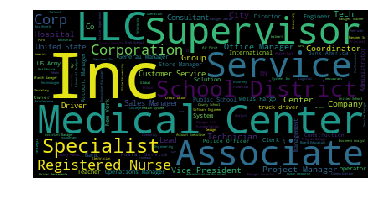

In [51]:
from wordcloud import WordCloud

# Employee Title
emp_title = new_data_df[8]
emp_title = pd.DataFrame(emp_title)
emp_title.columns = ['Employee Title']
emp_title = emp_title.dropna(axis=0, how='all')
wordcloud = WordCloud().generate(' '.join(emp_title['Employee Title']))

# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**2. Title** <a id="debt_title"></a>

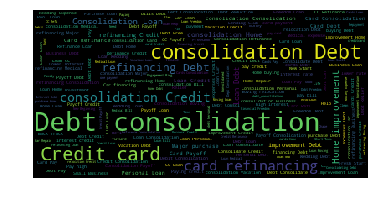

In [52]:
# Title 
title = new_data_df[19]
title = pd.DataFrame(title)
title.columns = ['Title']
title = title.dropna(axis=0, how='all')
wordcloud3 = WordCloud().generate(' '.join(title['Title']))

# Generate plot
plt.imshow(wordcloud3)
plt.axis("off")
plt.show()

We can notice that majority of the people took a loan for debt consolidation, refinancing debt, credit card payment, or home improvement.

**3. Description** <a id="debt_purpose"></a>

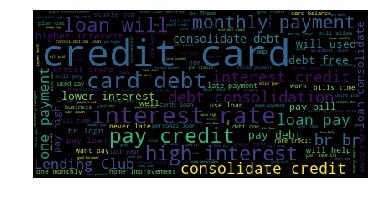

In [57]:
# Description
Description = new_data_df[17]
Description = Description.dropna(axis=0, how='all')
Description = list(Description)
Description_1 = []
i = 0 
for i in range(0,len(Description)):
    s = Description[i]
    s = s.replace("Borrower added on ", "")
    s = s.replace("<br>", "")
    Description_1.append(s)
    i = i+1
Description_1 = pd.DataFrame(Description_1)
Description_1.columns = ['Description']
wordcloud4 = WordCloud().generate(' '.join(Description_1['Description']))

# Generate plot
plt.imshow(wordcloud4)
plt.axis("off")
plt.show()

We can notice that majority of the people described their reason for taking loan to pay off high interest credit card loan pay.

## Part III. Model Building <a id="model_building"></a> <br>
1. Cleaning the data <a id="cleaning_data"></a> <br>
   * Selecting necessary features
   * Taking care of nan values

In [77]:
# Data pre-processing

# Dealing with na values
new_data_copy = np.vstack((category_one_data,category_two_data))
new_data_copy = pd.DataFrame(new_data_copy)
#print(np.shape(new_data_copy)) # Dimensions of the dataset
#print(new_data_copy.isnull().sum()) # Printing number of na values in each column 
#data_2 = new_data_copy.dropna(axis = 1, how = 'all') # Dropping columns where all values are na
data_2 = new_data_copy
#print(np.shape(data_2)) # Dimensions of new dataset
# We can observe that one of the column was removed since it was completely empty
data_dim = np.shape(data_2)

# We can see that a lot of columns contain 70% na values, which is no good for us
# Columns having more than 20-30% na values would not be of much help, thus eliminating them
col_nos = []
i = 0
for i in range (0,data_dim[1]):
    num_na_val = data_2[i].isnull().sum()
    if (num_na_val/len(data_2)) > 0.2:
        col_nos.append(i)
    i = i+1

data_2 = data_2.drop(data_2.columns[col_nos], axis = 1)
#print(data_2.isnull().sum())
np.shape(data_2)

# Now lets drop the columns like id, employee title, description,etc. which cannot be taken into consideration while modelling 
rename_var_1 = range(0,49)
data_2.columns = rename_var_1
cols_remove = [0,10,11,17,18,19,20,21]
data_2 = data_2.drop(data_2.columns[cols_remove], axis = 1)
np.shape(data_2)

rename_var_2 = range(0,41)
data_2.columns = rename_var_2
time_series_var = [12,17,34,36]
cat_var_cols = [4,7,8,9,11,14,16,18,19,20,24,25,32,33,37,38,39]
cat_plus_time_cols = [4,7,8,9,11,12,14,16,17,18,19,20,24,25,32,33,34,36,37,38,39]
cat_var_df = data_2.iloc[:,cat_var_cols].values
cat_var_df = pd.DataFrame(cat_var_df)
#cat_var_df.describe(include=['category'])
i = 0
unique_categories = []
for i in cat_var_df:
    un_cat = np.unique(cat_var_df[i])
    unique_categories.append(un_cat)
    i = i+1
    
# Removing more columns based on the above result
#print(unique_categories)
c = [11,12,13,15]
cat_var_df = cat_var_df.drop(cat_var_df.columns[c], axis = 1)
np.shape(cat_var_df)
r_var = range(0,13)
# We can observe that column 16 has 56 null values, let us replace them with the most frequent value of the column
cat_var_df.columns = r_var
#print(cat_var_df.isnull().sum())
# Taking care of missing values for categorical features
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'most_frequent', axis = 0)
imputer = imputer.fit(cat_var_df[[11]])
cat_var_df[11] = imputer.transform(cat_var_df[[11]])
#print(cat_var_df[11].isnull().sum())
#print(cat_var_df.isnull().sum())
renaming_df = range(0,13)
cat_var_df.columns = renaming_df
# We can clearly see that now there are no more na values
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
i = 0
for i in range(0,13):
    cat_var_df[i] = labelencoder_X.fit_transform(cat_var_df[i])
    #onehotencoder = OneHotEncoder(categorical_features = [i])
    i = i+1

# Taking care of missing values for remaining features
#print(data_2.isnull().sum())
data_2_copy = data_2
non_cat_var = data_2_copy.drop(data_2_copy.columns[cat_plus_time_cols], axis = 1)
rename_var = range(0,20)
non_cat_var.columns = rename_var


# Also dropping the target variable
Y = non_cat_var[[7]]
non_cat_var = non_cat_var.drop(non_cat_var.columns[7], axis = 1) 
#non_cat_var = non_cat_var.drop(non_cat_var.columns[0], axis = 1) # Dropping the variable id
renaming_df = range(0,19)
non_cat_var.columns = renaming_df
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
i = 0
for i in non_cat_var:
    imputer = imputer.fit(non_cat_var[[i]])
    non_cat_var[i] = imputer.transform(non_cat_var[[i]])
    i = i+1
    
#print(non_cat_var.isnull().sum())   

# We have no nan values in our non_cat_var now
# Let us now concatenate the categrical variables and non_categorical variables and form ourfeature matrix.
# Checking the dimensions
print(np.shape(non_cat_var))
print(np.shape(cat_var_df))
print(np.shape(Y))

X = np.hstack((non_cat_var,cat_var_df)) # Concatenating

(252971, 19)
(252971, 13)
(252971, 1)


Now, we can:<br>
* Label Encoding the target variable "Loan status".<br>
* Splitting the dataset.<br>
* Feature scaling<br>

In [78]:
# Label encoding the target variable 
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

#Splitting the dataset in training and testing set
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



For model comparison, 6 Models are selected for this analysis, and they are as follows:
<a id="ModelSelection"></a> <br>
* Model 1 - XGBoostClassifier
* Model 2 - Support Vector Classifier(SCV)
* Model 3 - RandomForestClassifier
* Model 4 - Logistic
* Model 5 - BalancedBaggingClassifier
* Model 6 - Decision Tree

In [80]:
# Fitting XGBClassifier to the training data: Model_1
from xgboost import XGBClassifier
classifier_1 = XGBClassifier()
classifier_1.fit(X_train,Y_train)

# Fitting SVM to the training data: Model 2
from sklearn.svm import SVC
classifier_2 = SVC(kernel = 'linear', C = 1, probability = True, random_state = 0) # poly, sigmoid
classifier_2.fit(X_train,Y_train)

# Creating and Fitting Random Forest Classifier to the training data: Model 3
from sklearn.ensemble import RandomForestClassifier
classifier_3 = RandomForestClassifier(n_estimators = 5, criterion = 'entropy')
classifier_3.fit(X_train,Y_train)

# Fitting classifier to the training data: Model 4 
from sklearn.linear_model import LogisticRegression
classifier_4 = LogisticRegression(penalty = 'l1', random_state = 0)
classifier_4.fit(X_train,Y_train)

# Fitting Balanced Bagging Classifier to the training data: Model 5
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import RandomForestClassifier
classifier_5 = BalancedBaggingClassifier(base_estimator = RandomForestClassifier(criterion='entropy'),
                                       n_estimators = 5, bootstrap = True)
classifier_5.fit(X_train,Y_train)

# Fitting Decision Tree to the training data: Model 6
from sklearn.tree import DecisionTreeClassifier
classifier_6 = DecisionTreeClassifier()
classifier_6.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [81]:
# Predicting the results
y_pred_1 = classifier_1.predict(X_test)
y_pred_2 = classifier_2.predict(X_test)
y_pred_3 = classifier_3.predict(X_test)
y_pred_4 = classifier_4.predict(X_test)
y_pred_5 = classifier_5.predict(X_test)
y_pred_6 = classifier_6.predict(X_test)

# Creating the confusion matrix
from sklearn.metrics import confusion_matrix
cm_1 = confusion_matrix(Y_test,y_pred_1)
accuracy_1 = (cm_1[0,0]+cm_1[1,1])/len(Y_test)

cm_2 = confusion_matrix(Y_test,y_pred_2)
accuracy_2 = (cm_2[0,0]+cm_2[1,1])/len(Y_test)

cm_3 = confusion_matrix(Y_test,y_pred_3)
accuracy_3 = (cm_3[0,0]+cm_3[1,1])/len(Y_test)

cm_4 = confusion_matrix(Y_test,y_pred_4)
accuracy_4 = (cm_4[0,0]+cm_4[1,1])/len(Y_test)

cm_5 = confusion_matrix(Y_test,y_pred_5)
accuracy_5 = (cm_5[0,0]+cm_5[1,1])/len(Y_test)

cm_6 = confusion_matrix(Y_test,y_pred_6)
accuracy_6 = (cm_6[0,0]+cm_6[1,1])/len(Y_test)


print("Accuracy_XGBoost:",accuracy_1*100,'%',"\nAccuracy_SVC:",accuracy_2*100,'%',"\nAccuracy_RF:",accuracy_3*100,'%',"\nAccuracy_Logistic:",accuracy_4*100,'%',
      "\nAccuracy_BalancedBagging:",accuracy_5*100,'%',"\nAccuracy_DecisionTree:",accuracy_6*100,'%')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



Accuracy_XGBoost: 99.42682083209803 % 
Accuracy_SVC: 99.77072833283921 % 
Accuracy_RF: 99.73119873505287 % 
Accuracy_Logistic: 99.7114339361597 % 
Accuracy_BalancedBagging: 99.75096353394605 % 
Accuracy_DecisionTree: 99.74108113449945 %


We can see that the accuracy for all the models is very high and pretty much the same. Thus we could prefereably use a simpler model like Decision Tree to classify our data.

For future work, since as the dataset is huge, one can try classify this dataset using Artificial Neural Networks Networks. Also instead of binary classification one can try multi-class classification.